Radius (r): 42.42640687119285
Center (x, y): (234.0, 0.0)


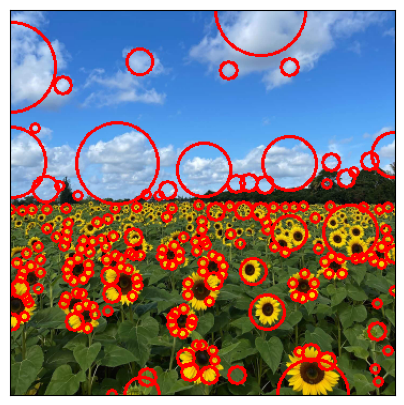

In [15]:
import cv2 as cv
import numpy as np
from skimage.feature import blob_log
from math import sqrt

# Load the image
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Apply Gaussian blur to reduce noise
blurred = cv.GaussianBlur(im, (9, 9), 0.1)

# Convert the image to grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Define parameters for blob detection
min_sigma = 3
max_sigma = 30
threshold = .1

# Detect blobs using Laplacian of Gaussians
blobs = blob_log(gray, min_sigma=min_sigma, max_sigma=max_sigma, threshold=threshold)
blobs[:, 2] = blobs[:, 2] * sqrt(2)

max_radius_index = np.argmax(blobs[:, 2])
largest_circle_params = blobs[max_radius_index]
y, x, r = largest_circle_params
print(f"Radius (r): {r}")
print(f"Center (x, y): ({x}, {y})")

# Draw circles on the original color image
for blob in blobs:
    y, x, r = blob  # Blob format is (y, x, r)
    cv.circle(im, (int(x), int(y)), int(r), (0, 0, 255), 2)  # Draw circles in red
    
fig, ax = plt.subplots(figsize=(5, 5))
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)
ax.imshow(img)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

Largest Circle Radius: 42.42640687119285
Largest Circle Center Coordinates: (x: 234.0, y: 0.0)


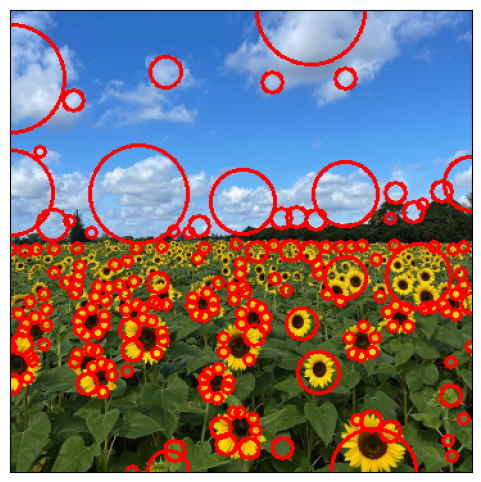

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log
from math import sqrt

# Load the image with the exact path specified in the assignment
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Apply Gaussian blur to reduce noise
blurred = cv.GaussianBlur(im, (9, 9), 0.1)

# Convert the image to grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Define parameters for blob detection
min_sigma = 3
max_sigma = 30
threshold = .1

# Detect blobs using Laplacian of Gaussians
blobs = blob_log(gray, min_sigma=min_sigma, max_sigma=max_sigma, threshold=threshold)
blobs[:, 2] = blobs[:, 2] * sqrt(2)  # Convert radii from sqrt(2) scaling

# Identify the largest circle
max_radius_index = np.argmax(blobs[:, 2])
largest_circle_params = blobs[max_radius_index]
y, x, r = largest_circle_params
print(f"Largest Circle Radius: {r}")
print(f"Largest Circle Center Coordinates: (x: {x}, y: {y})")

# Draw circles on the original image
for blob in blobs:
    y, x, r = blob
    cv.circle(im, (int(x), int(y)), int(r), (0, 0, 255), 2)

# Convert BGR to RGB for displaying in matplotlib
img_rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)

# Show the image with circles
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img_rgb)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


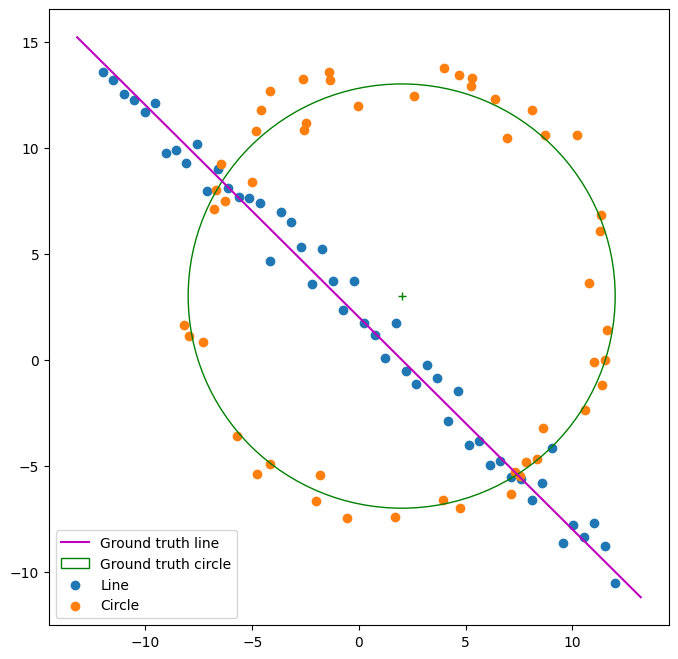

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import tikzplotlib

# Constants
N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16

# Generate random points for the circle
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x = x0_gt + (r + n) * np.cos(t)
y = y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Generate random points for the line
s = 1.0
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Combine all points
X = np.vstack((X_circ, X_line))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Scatter plot for the line points
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')

# Scatter plot for the circle points
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

# Ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, '+', color='g')

x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

plt.legend()
plt.show()
